In [24]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [25]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Set the number classes

In [26]:
NUM_CLASSES = 7

# Load data

In [27]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [28]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Building

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [31]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)              │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)              │           860 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)              │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)              │           210 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)               │            77 │
└─────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Model Checkpoint Callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback on early termination
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [33]:
# Model synthesis
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create train model

In [34]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback]
)

Epoch 1/500
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1509 - loss: 1.9387
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1521 - loss: 1.9373 - val_accuracy: 0.3138 - val_loss: 1.7812
Epoch 2/500
33/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2758 - loss: 1.8105 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2831 - loss: 1.8012 - val_accuracy: 0.4178 - val_loss: 1.6438
Epoch 3/500
 1/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3672 - loss: 1.7287
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3567 - loss: 1.6864 - val_accuracy: 0.4918 - val_loss: 1.4768
Epoch 4/500
38/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4017 - loss: 1.5644 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
51/5

In [35]:
# Model Evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9403 - loss: 0.2729


In [36]:
# Load saved model
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[4.0425876e-01 4.1212995e-02 4.2675554e-05 5.5448556e-01 1.3686474e-08
 1.5847268e-20 9.9324843e-22]
3


# Confusion Matrix

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


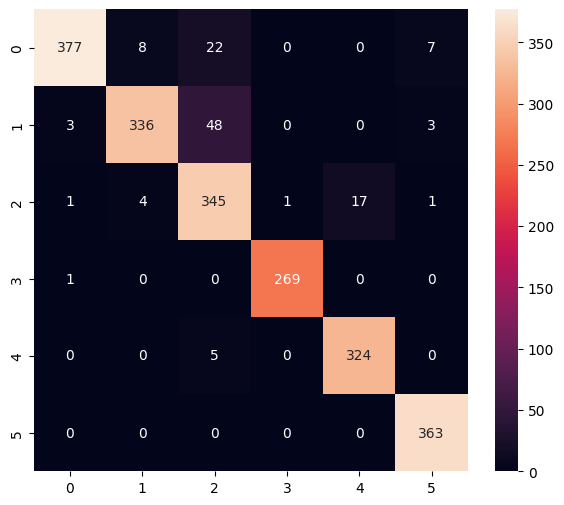

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       414
           1       0.97      0.86      0.91       390
           2       0.82      0.93      0.87       369
           3       1.00      1.00      1.00       270
           4       0.95      0.98      0.97       329
           5       0.97      1.00      0.99       363

    accuracy                           0.94      2135
   macro avg       0.95      0.95      0.95      2135
weighted avg       0.95      0.94      0.94      2135



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [39]:
# Save in Tensorflow Lite

In [40]:
model.save(model_save_path, include_optimizer=False)

In [41]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmp73iqf13_\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmp73iqf13_\assets


Saved artifact at 'C:\Users\LENOVO\AppData\Local\Temp\tmp73iqf13_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1540520218448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1540520223056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1540520219792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1540520220176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1540520219984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1540520221712: TensorSpec(shape=(), dtype=tf.resource, name=None)


6672

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.06 ms


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.0425879e-01 4.1212920e-02 4.2675514e-05 5.5448562e-01 1.3686475e-08
 1.5847267e-20 9.9324459e-22]
3
